<a href="https://colab.research.google.com/github/JennyDuda/jennifermendes/blob/main/Segmenta%C3%A7%C3%A3oClientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project: Mall Customers — Segmentação de Clientes
- Gerar segmentos acionáveis de clientes e recomendações de negócio.


Fonte dos dados
---------------
- Dataset: Mall Customers (Kaggle). O notebook usa `kagglehub` para baixar automaticamente a versão usada.


Estrutura do notebook
---------------------
1. Imports e configuração
2. Download e carregamento do dataset
3. Limpeza e feature engineering (faixas etárias, codificação, padronização)
4. EDA (histogramas, scatter, correlação)
5. Clustering com K-Means + avaliação (Silhouette)
6. Comparativo de modelos supervisionados para classificação dos clusters
7. Visualização avançada (PCA, t-SNE)
8. Geração automática de insights por cluster


Por que estas escolhas (breve justificativa)
--------------------------------------------
- Renomeação de colunas: melhora legibilidade e facilita reuso do código.
- Faixas etárias: criam segmentações interpretáveis para ação de negócio.
- Padronização (StandardScaler): **necessária** para K-Means (usa distância euclidiana) e para modelos que sensíveis à escala.
- K-Means (n_clusters=5): escolha baseada em convenções para o dataset e validação via Silhouette; você pode rodar o método elbow/silhouette para ajustar.
- Modelos testados: Logistic Regression (baseline linear), Random Forest e Gradient Boosting (tree-based, robustos) — oferecem bom contraste entre interpretabilidade e performance.
- Métricas: Accuracy e F1-weighted para multi-classe; Silhouette para qualidade de cluster.


Como rodar
----------
- Requisitos: Python 3.8+, e instalar dependências: `pip install kagglehub scikit-learn seaborn matplotlib pandas`.
- Em Colab: garanta que o `kagglehub` consiga acesso (não precisa enviar kaggle.json se o notebook já usar o cache local do `kagglehub`).
- Execute as células na ordem; o notebook foi organizado para ser executado sequencialmente.


Arquivos de saída sugeridos
--------------------------
- `cluster_summary.csv` — médias e contagens por cluster (salvar para uso externo).
- `cluster_assignments.csv` — df com coluna `Cluster` anexada.


Próximos passos / melhorias
--------------------------
- Testar diferentes `k` (elbow/silhouette) e documentar a escolha final.
- Fazer tuning (GridSearch/CV) nos modelos supervisionados.
- Criar um dashboard (Streamlit/Power BI) com as visualizações e filtros interativos.
- Analisar estabilidade dos clusters ao mudar seed ou fazer bootstrap.


Observações de reprodução e ética
--------------------------------
- Use `random_state` fixo para resultados reprodutíveis.
- Considere privacidade e viés ao aplicar segmentações em dados reais.


Contato
www.linkedin.com/in/jennifer-freitas-mendes
------




 Baixando dataset via KaggleHub...


100%|██████████| 1.56k/1.56k [00:00<00:00, 3.06MB/s]

Extracting files...
 Dataset baixado em: /root/.cache/kagglehub/datasets/abdallahwagih/mall-customers-segmentation/versions/1/Mall_Customers.csv

 Primeiras linhas do dataset:


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



 Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

 Valores ausentes por coluna:


,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0



Duplicados: 0


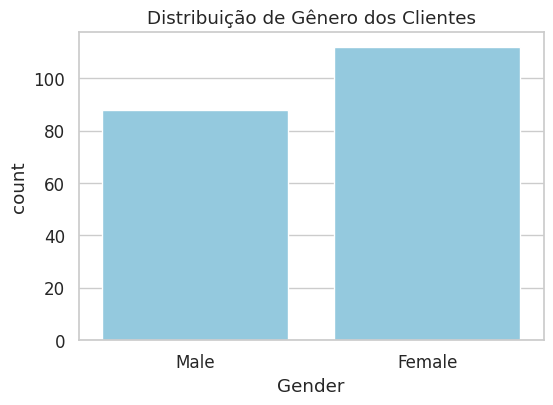

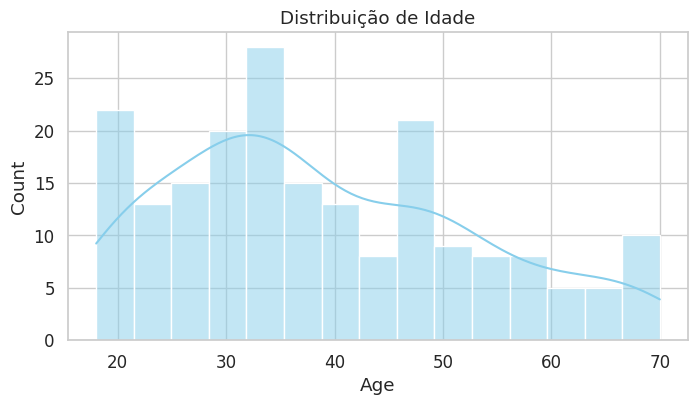

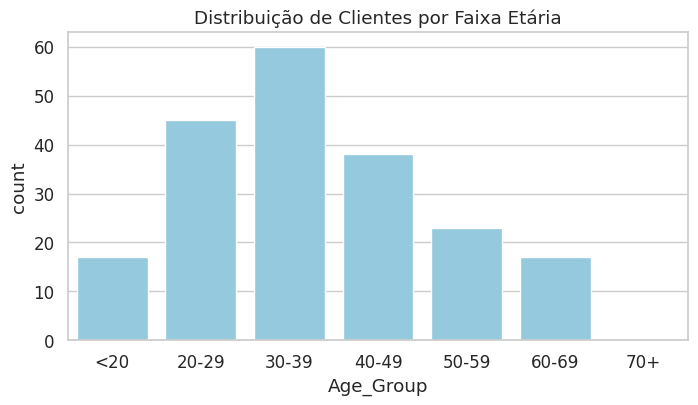

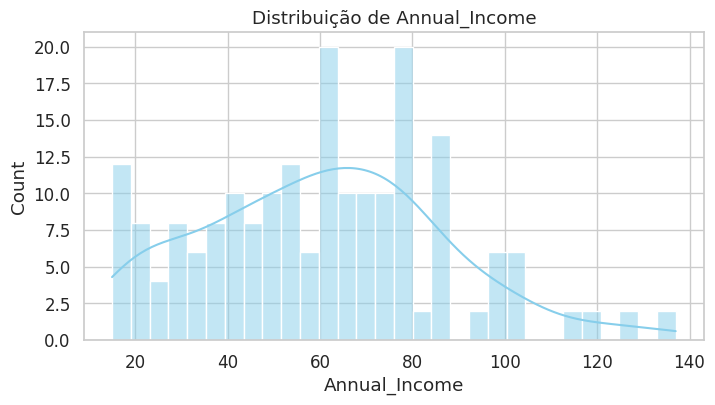

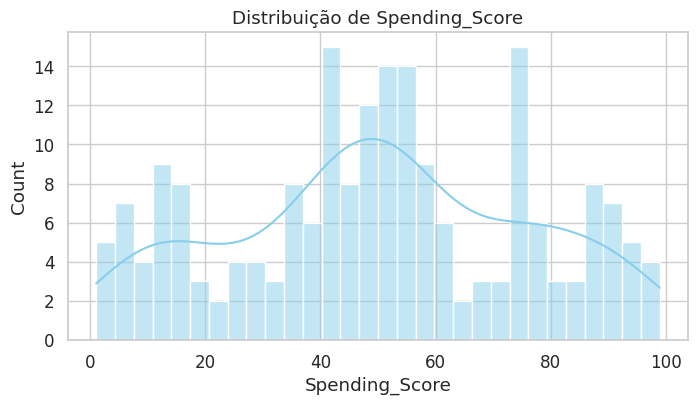

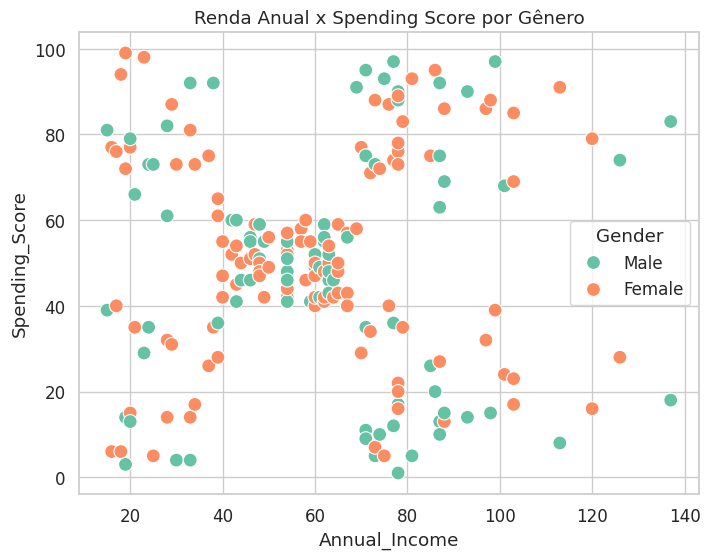

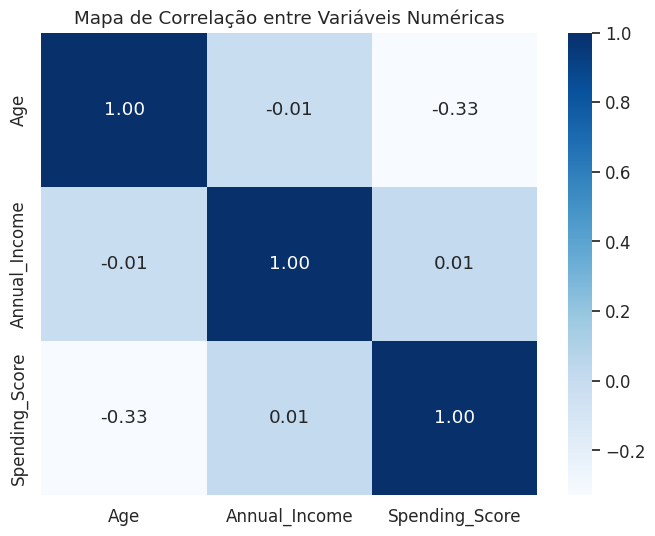

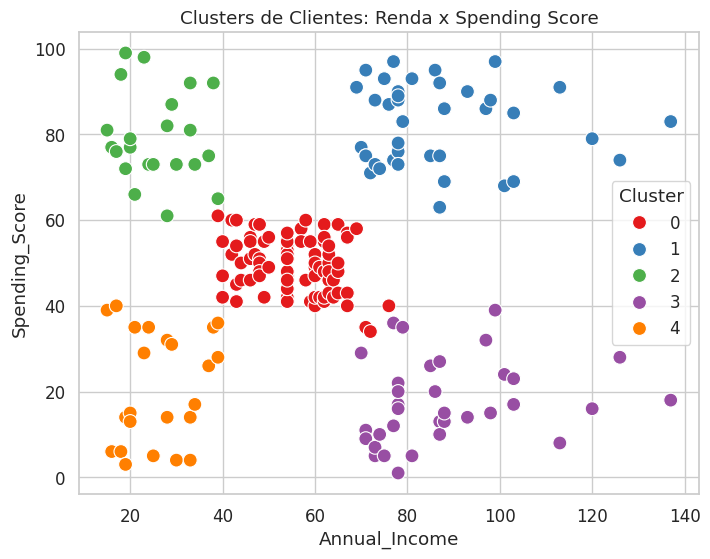

 Número de clusters: 5

 Distribuição de clientes por cluster:


,count
Cluster,
0,81
1,39
3,35
4,23
2,22



 Silhouette Score: 0.555


/tmp/ipython-input-2371428416.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette="Set2", hue=None)


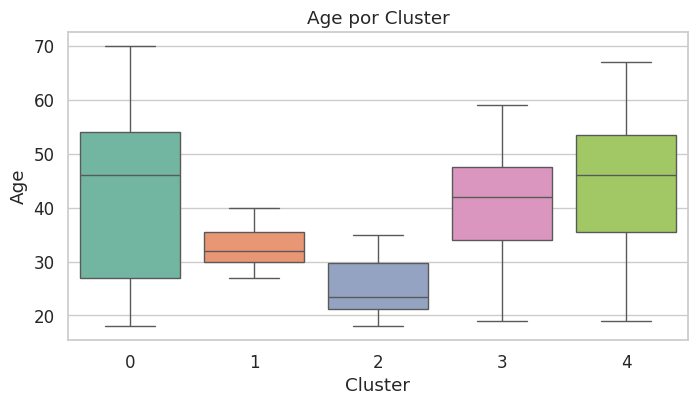

/tmp/ipython-input-2371428416.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette="Set2", hue=None)


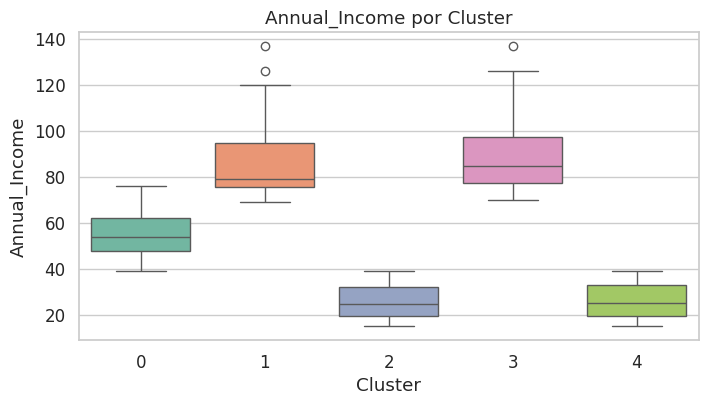

/tmp/ipython-input-2371428416.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df, palette="Set2", hue=None)


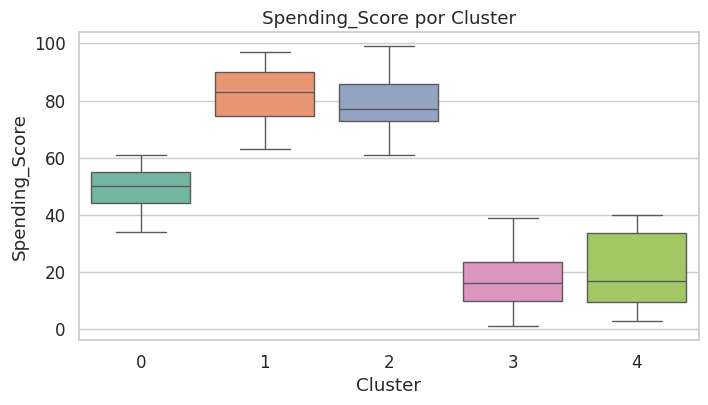

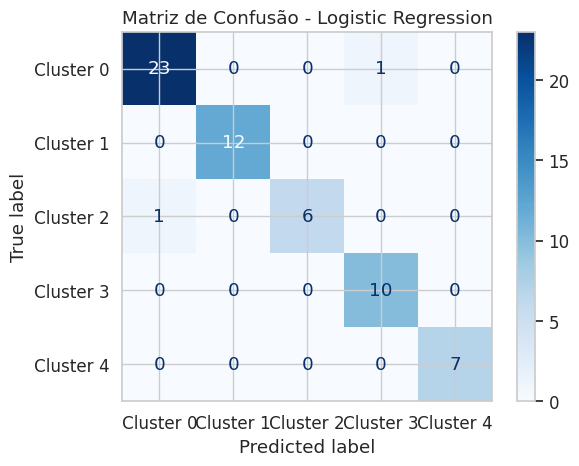

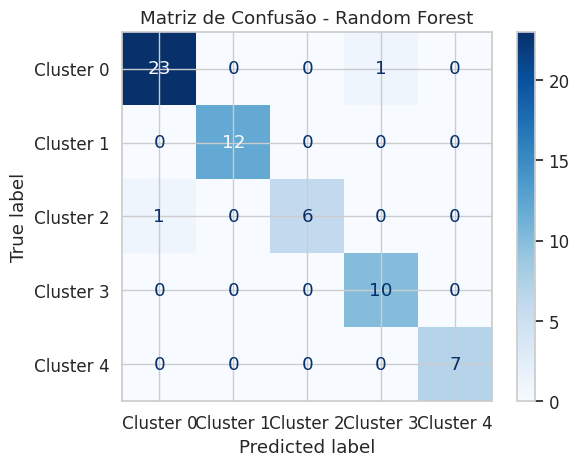

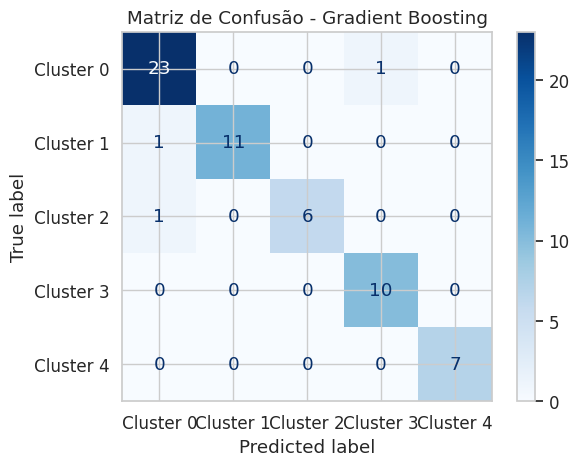


 Comparação de Modelos:


,Accuracy,F1-Score
Logistic Regression,0.966667,0.966422
Random Forest,0.966667,0.966422
Gradient Boosting,0.950000,0.949904


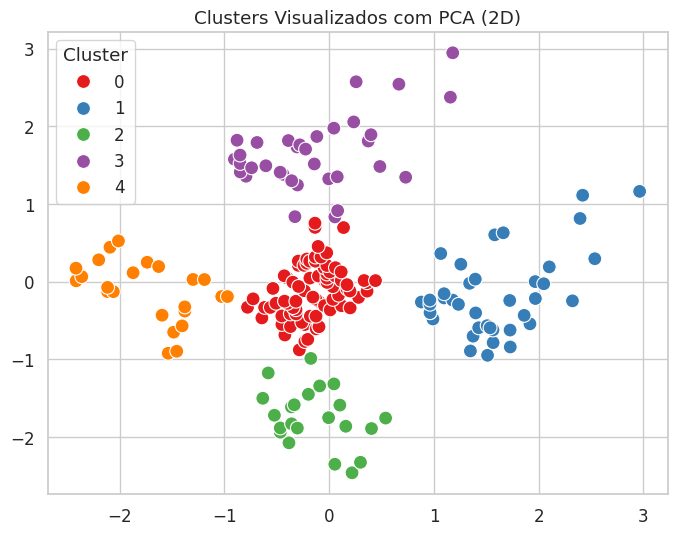

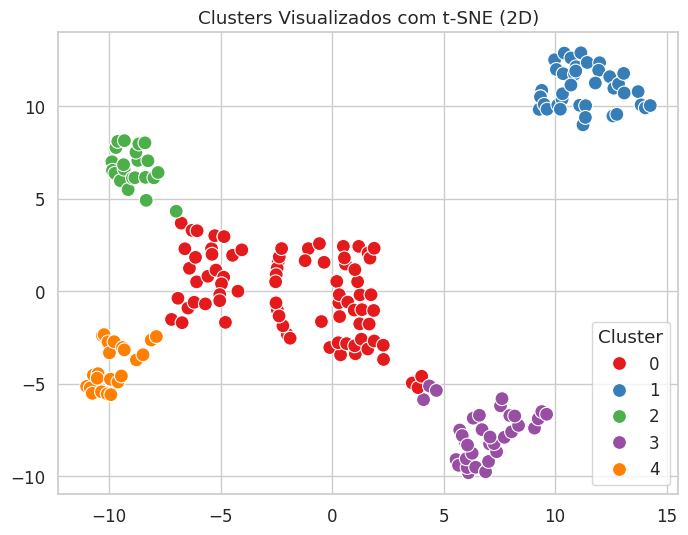


 Insights automáticos por cluster:
Cluster 0: clientes adultos (idade média 42.7), renda média (~$55.3k), moderadamente engajados (score médio 49.5).
Cluster 1: clientes adultos (idade média 32.7), renda alta (~$86.5k), altamente engajados em gastos (score médio 82.1).
Cluster 2: clientes jovens (idade média 25.3), renda baixa (~$25.7k), altamente engajados em gastos (score médio 79.4).
Cluster 3: clientes adultos (idade média 41.1), renda alta (~$88.2k), pouco engajados em gastos (score médio 17.1).
Cluster 4: clientes adultos (idade média 45.2), renda baixa (~$26.3k), pouco engajados em gastos (score médio 20.9).


In [1]:
# IMPORTAÇÃO E CONFIGURAÇÃO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import kagglehub

# Configuração de estilo geral
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# DOWNLOAD E CARREGAMENTO DO DATASET
print(" Baixando dataset via KaggleHub...")
path = kagglehub.dataset_download("abdallahwagih/mall-customers-segmentation")
dataset_file = f"{path}/Mall_Customers.csv"
print(f" Dataset baixado em: {dataset_file}")

df = pd.read_csv(dataset_file)

# Renomeando colunas para facilitar uso
df.rename(columns={
    'CustomerID': 'CustomerID',
    'Genre': 'Gender',
    'Age': 'Age',
    'Annual Income (k$)': 'Annual_Income',
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

print("\n Primeiras linhas do dataset:")
display(df.head())

print("\n Informações gerais do dataset:")
df.info()

# LIMPEZA E FEATURE ENGINEERING
print("\n Valores ausentes por coluna:")
display(df.isnull().sum())
print("\nDuplicados:", df.duplicated().sum())

# Faixa etária
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20','20-29','30-39','40-49','50-59','60-69','70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Codificação de gênero
df['Gender_Code'] = LabelEncoder().fit_transform(df['Gender'])

# Padronização
scaler = StandardScaler()
df[['Age_scaled', 'Income_scaled', 'Score_scaled']] = scaler.fit_transform(
    df[['Age','Annual_Income','Spending_Score']]
)

# Análise exploratória de dados(EDA)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', color='skyblue')
plt.title('Distribuição de Gênero dos Clientes')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=15, kde=True, color='skyblue')
plt.title('Distribuição de Idade')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Age_Group', color='skyblue', order=labels)
plt.title('Distribuição de Clientes por Faixa Etária')
plt.show()

for col in ['Annual_Income','Spending_Score']:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribuição de {col}')
    plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Gender', palette='Set2', s=100)
plt.title('Renda Anual x Spending Score por Gênero')
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Annual_Income','Spending_Score']].corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

# CLUSTERING - K-MEANS
X_cluster = df[['Income_scaled','Score_scaled']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters de Clientes: Renda x Spending Score')
plt.show()

print(f" Número de clusters: {df['Cluster'].nunique()}")
print("\n Distribuição de clientes por cluster:")
display(df['Cluster'].value_counts())

sil_score = silhouette_score(X_cluster, df['Cluster'])
print(f"\n Silhouette Score: {sil_score:.3f}")

for col in ['Age','Annual_Income','Spending_Score']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Cluster', y=col, data=df, palette="Set2", hue=None)
    plt.title(f"{col} por Cluster")
    plt.show()

# MACHINE LEARNING - Comparativo de Modelos
X = df[['Age','Annual_Income','Spending_Score','Gender_Code']]
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {'Accuracy': acc, 'F1-Score': f1}

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=[f'Cluster {i}' for i in sorted(df['Cluster'].unique())])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {name}')
    plt.show()

results_df = pd.DataFrame(results).T
print("\n Comparação de Modelos:")
display(results_df)

# VISUALIZAÇÃO AVANÇADA DE CLUSTERS
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters Visualizados com PCA (2D)')
plt.show()

tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_cluster)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Clusters Visualizados com t-SNE (2D)')
plt.show()

# GERAÇÃO DE INSIGHTS AUTOMÁTICOS
cluster_summary = df.groupby('Cluster')[['Age','Annual_Income','Spending_Score']].mean().round(1)

print("\n Insights automáticos por cluster:")

def gerar_insights(summary):
    insights = []
    for cluster, row in summary.iterrows():
        idade = row['Age']
        renda = row['Annual_Income']
        score = row['Spending_Score']

        if idade < 30:
            faixa_idade = "jovens"
        elif idade < 50:
            faixa_idade = "adultos"
        else:
            faixa_idade = "maduros"

        if renda < 40:
            faixa_renda = "baixa"
        elif renda < 70:
            faixa_renda = "média"
        else:
            faixa_renda = "alta"

        if score < 40:
            perfil = "pouco engajados em gastos"
        elif score < 70:
            perfil = "moderadamente engajados"
        else:
            perfil = "altamente engajados em gastos"

        insights.append(
            f"Cluster {cluster}: clientes {faixa_idade} (idade média {idade}), "
            f"renda {faixa_renda} (~${renda}k), {perfil} (score médio {score})."
        )
    return insights

for txt in gerar_insights(cluster_summary):
    print(txt)